# Flight Price Prediction using Machine Learning

## Project Overview
This project focuses on building a robust end-to-end machine learning pipeline to predict flight ticket prices. By analyzing real-world flight data, we aim to understand the key factors influencing airfares such as airline carrier, travel route, timing, and class and build predictive models to estimate future costs.

This notebook simulates a professional data science workflow, covering the following key stages:
1.  **Data Loading & Inspection**: Ingesting the 'Flight Price Dataset of Bangladesh' and understanding its schema.
2.  **Data Cleaning & Preprocessing**: Handling missing values, standardizing column names, and correcting data types.
3.  **Exploratory Data Analysis (EDA)**: Visualizing price distributions, seasonal trends, and correlations to derive actionable insights.
4.  **Feature Engineering**: Transforming raw dates and categorical attributes into machine-readable features.
5.  **Model Development**: Training and comparing regression models (Linear Regression, Random Forest, etc.).
6.  **Model Evaluation**: Assessing performance using industrial metrics like RMSE and R² Score.

Our goal is to deliver a model that provides accurate fare estimates, aiding in dynamic pricing strategies and travel cost planning.

In [ ]:
# !pip install pandas numpy matplotlib seaborn scikit-learn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached tzdata-2025.3-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.7 MB 524.3 kB/s eta 0:00:18
   -- ------------------------------------- 0.5/9.7 MB 524.3 kB/s eta 0:00:18
   -- ------------------------------------- 0.5/9.7 MB 524.3 kB/s eta 0:00:18
   -


[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# 1. Import Essential Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings


# Configuration
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
warnings.filterwarnings('ignore')

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("Libraries imported successfully.")

Libraries imported successfully.


## 2. Data Loading and Inspection

In [58]:
# Load the dataset
# If running on Kaggle, update the path to the input directory
data_path = 'data/Flight_Price_Dataset_of_Bangladesh.csv'

try:
    df = pd.read_csv(data_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: File not found at {data_path}. Please check the path.")

# Display first 5 rows to understand the structure
df.head()

Dataset loaded successfully.


,Airline,Source,Source Name,Destination,Destination Name,Departure Date & Time,Arrival Date & Time,Duration (hrs),Stopovers,Aircraft Type,Class,Booking Source,Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Seasonality,Days Before Departure
0,Malaysian Airlines,CXB,Cox's Bazar Airport,CCU,Netaji Subhas Chandra Bose International Airpo...,2025-11-17 06:25:00,2025-11-17 07:38:10,1.219526,Direct,Airbus A320,Economy,Online Website,21131.225021,5169.683753,26300.908775,Regular,10
1,Cathay Pacific,BZL,Barisal Airport,CGP,"Shah Amanat International Airport, Chittagong",2025-03-16 00:17:00,2025-03-16 00:53:31,0.608638,Direct,Airbus A320,First Class,Travel Agency,11605.395471,200.000000,11805.395471,Regular,14
2,British Airways,ZYL,"Osmani International Airport, Sylhet",KUL,Kuala Lumpur International Airport,2025-12-13 12:03:00,2025-12-13 14:44:22,2.689651,1 Stop,Boeing 787,Economy,Travel Agency,39882.499349,11982.374902,51864.874251,Winter Holidays,83
3,Singapore Airlines,RJH,"Shah Makhdum Airport, Rajshahi",DAC,"Hazrat Shahjalal International Airport, Dhaka",2025-05-30 03:21:00,2025-05-30 04:02:09,0.686054,Direct,Airbus A320,Economy,Direct Booking,4435.607340,200.000000,4635.607340,Regular,56
4,British Airways,SPD,Saidpur Airport,YYZ,Toronto Pearson International Airport,2025-04-25 09:14:00,2025-04-25 23:17:20,14.055609,1 Stop,Airbus A350,Business,Direct Booking,59243.806146,14886.570922,74130.377068,Regular,90


In [4]:
# Check dataset info (rows, columns, data types)
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 57000 entries, 0 to 56999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Airline                57000 non-null  str    
 1   Source                 57000 non-null  str    
 2   Source Name            57000 non-null  str    
 3   Destination            57000 non-null  str    
 4   Destination Name       57000 non-null  str    
 5   Departure Date & Time  57000 non-null  str    
 6   Arrival Date & Time    57000 non-null  str    
 7   Duration (hrs)         57000 non-null  float64
 8   Stopovers              57000 non-null  str    
 9   Aircraft Type          57000 non-null  str    
 10  Class                  57000 non-null  str    
 11  Booking Source         57000 non-null  str    
 12  Base Fare (BDT)        57000 non-null  float64
 13  Tax & Surcharge (BDT)  57000 non-null  float64
 14  Total Fare (BDT)       57000 non-null  float64
 15  Seasonality  

## 3. Data Cleaning and Preprocessing

In [59]:
# Standardize column names (snake_case) for easier access
df.columns = [col.strip().lower().replace(' ', '_').replace('&', 'and').replace('(', '').replace(')', '') for col in df.columns]

print("Cleaned Column Names:", df.columns.tolist())

# Identify target variable: 'total_fare_bdt'
target_col = 'total_fare_bdt'

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Check for duplicates
print("\nDuplicate Rows:", df.duplicated().sum())

# Drop duplicates if any
df.drop_duplicates(inplace=True)

Cleaned Column Names: ['airline', 'source', 'source_name', 'destination', 'destination_name', 'departure_date_and_time', 'arrival_date_and_time', 'duration_hrs', 'stopovers', 'aircraft_type', 'class', 'booking_source', 'base_fare_bdt', 'tax_and_surcharge_bdt', 'total_fare_bdt', 'seasonality', 'days_before_departure']

Missing Values:
 airline                    0
source                     0
source_name                0
destination                0
destination_name           0
departure_date_and_time    0
arrival_date_and_time      0
duration_hrs               0
stopovers                  0
aircraft_type              0
class                      0
booking_source             0
base_fare_bdt              0
tax_and_surcharge_bdt      0
total_fare_bdt             0
seasonality                0
days_before_departure      0
dtype: int64

Duplicate Rows: 0


In [60]:
# Convert Date Columns to DateTime objects
date_cols = ['departure_date_and_time', 'arrival_date_and_time']

for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col])

# Verify conversion
df[date_cols].dtypes

departure_date_and_time    datetime64[us]
arrival_date_and_time      datetime64[us]
dtype: object

## 4. Exploratory Data Analysis (EDA)
We will analyze the distribution of Flight Prices and their relationship with other features.

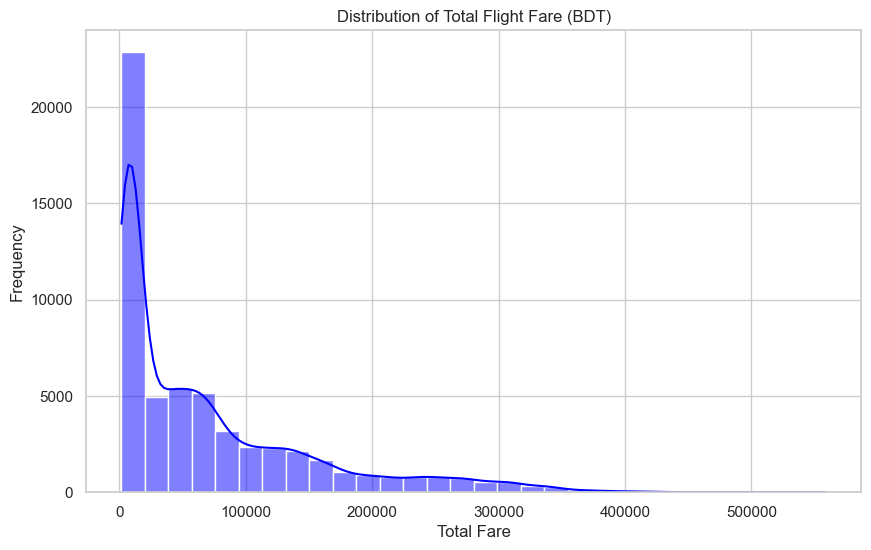

In [7]:
# 4.1 Distribution of Total Fare
plt.figure(figsize=(10, 6))
sns.histplot(df[target_col], kde=True, bins=30, color='blue')
plt.title('Distribution of Total Flight Fare (BDT)')
plt.xlabel('Total Fare')
plt.ylabel('Frequency')
plt.show()

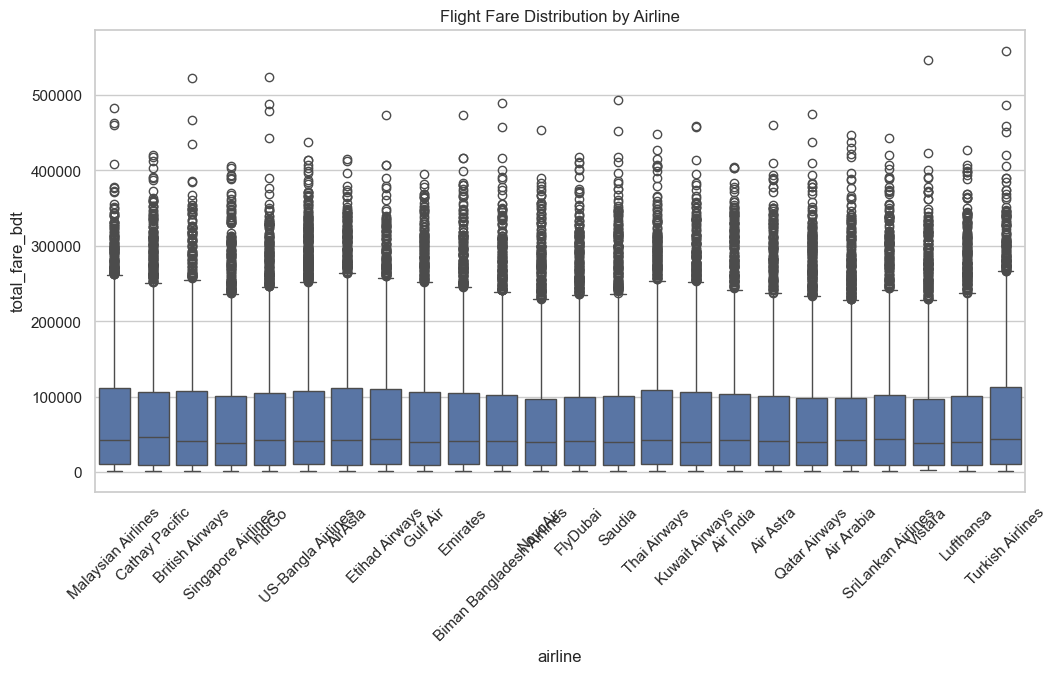

In [8]:
# 4.2 Fare vs Airline
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='airline', y=target_col)
plt.title('Flight Fare Distribution by Airline')
plt.xticks(rotation=45)
plt.show()

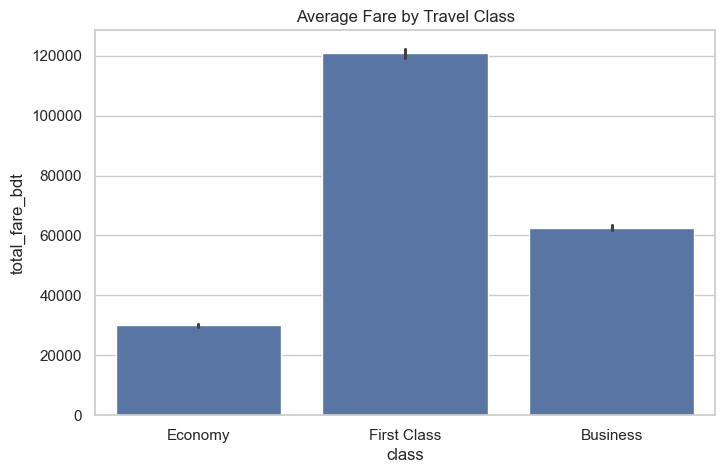

In [9]:
# 4.3 Fare vs Class
if 'class' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.barplot(data=df, x='class', y=target_col, estimator=np.mean)
    plt.title('Average Fare by Travel Class')
    plt.show()

In [61]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# 1. Identify all non-numeric columns (excluding the datetime objects)
non_numeric_cols = df.select_dtypes(include=['str', 'object']).columns.tolist()

# 2. Prepare a temporary dataframe for calculations
mi_df = pd.DataFrame()
le = LabelEncoder()

for col in non_numeric_cols:
    # We encode strings to integers so the math can run
    mi_df[col] = le.fit_transform(df[col].astype(str))

# 3. Calculate Mutual Information scores
# This tells us how much 'information' each category shares with the price
mi_scores = mutual_info_regression(mi_df, df['total_fare_bdt'], random_state=42)

# 4. Organize and display the results
mi_results = pd.Series(mi_scores, index=non_numeric_cols).sort_values(ascending=False)

print("Correlation Strength (Mutual Information) with Total Fare:")
print(mi_results)

Correlation Strength (Mutual Information) with Total Fare:
destination         0.599077
destination_name    0.599060
class               0.514862
aircraft_type       0.455469
stopovers           0.197659
seasonality         0.017148
source_name         0.001686
source              0.001662
airline             0.000169
booking_source      0.000000
dtype: float64


In [62]:
cols_to_drop = [
    'booking_source', 
]

df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

df.head()

,airline,source,source_name,destination,destination_name,departure_date_and_time,arrival_date_and_time,duration_hrs,stopovers,aircraft_type,class,base_fare_bdt,tax_and_surcharge_bdt,total_fare_bdt,seasonality,days_before_departure
0,Malaysian Airlines,CXB,Cox's Bazar Airport,CCU,Netaji Subhas Chandra Bose International Airpo...,2025-11-17 06:25:00,2025-11-17 07:38:10,1.219526,Direct,Airbus A320,Economy,21131.225021,5169.683753,26300.908775,Regular,10
1,Cathay Pacific,BZL,Barisal Airport,CGP,"Shah Amanat International Airport, Chittagong",2025-03-16 00:17:00,2025-03-16 00:53:31,0.608638,Direct,Airbus A320,First Class,11605.395471,200.000000,11805.395471,Regular,14
2,British Airways,ZYL,"Osmani International Airport, Sylhet",KUL,Kuala Lumpur International Airport,2025-12-13 12:03:00,2025-12-13 14:44:22,2.689651,1 Stop,Boeing 787,Economy,39882.499349,11982.374902,51864.874251,Winter Holidays,83
3,Singapore Airlines,RJH,"Shah Makhdum Airport, Rajshahi",DAC,"Hazrat Shahjalal International Airport, Dhaka",2025-05-30 03:21:00,2025-05-30 04:02:09,0.686054,Direct,Airbus A320,Economy,4435.607340,200.000000,4635.607340,Regular,56
4,British Airways,SPD,Saidpur Airport,YYZ,Toronto Pearson International Airport,2025-04-25 09:14:00,2025-04-25 23:17:20,14.055609,1 Stop,Airbus A350,Business,59243.806146,14886.570922,74130.377068,Regular,90


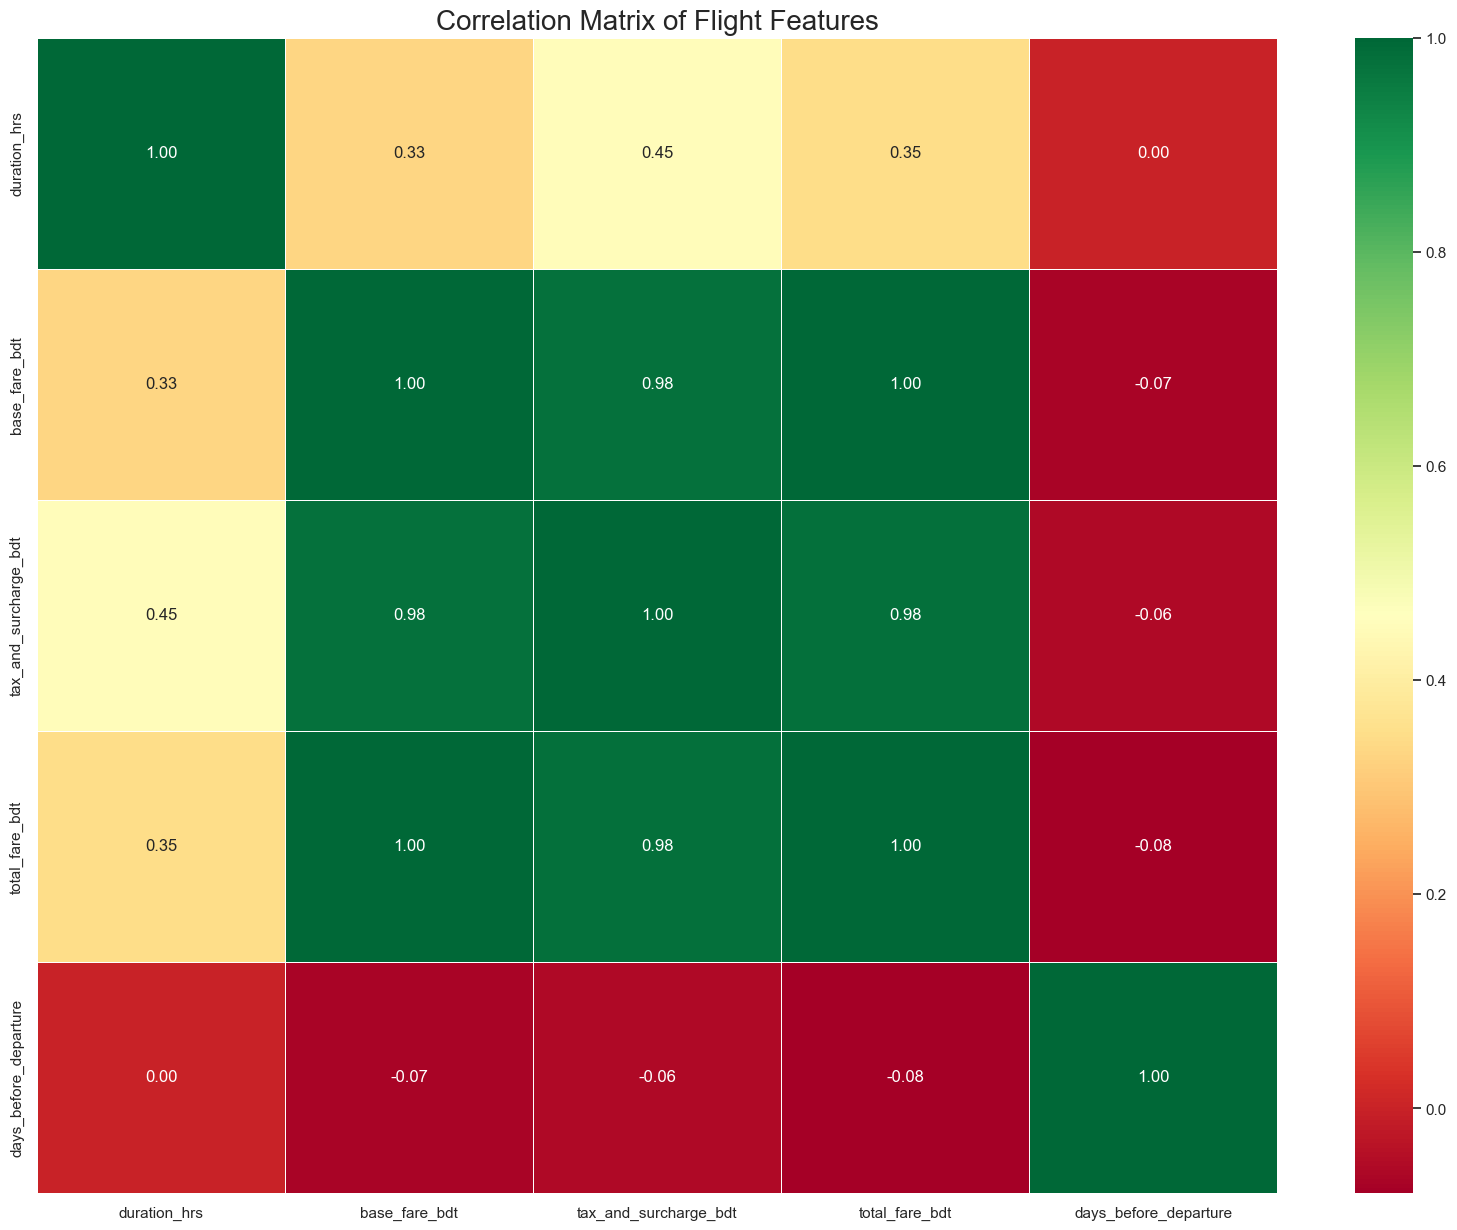

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
df_corr = df.copy()
# 1. Isolate numeric columns
# We exclude columns like 'airline' and 'source' for this specific diagram
numeric_data = df_corr.select_dtypes(include=['number'])

# 2. Set the size for readability given your 20+ numeric columns
plt.figure(figsize=(20, 15))

# 3. Generate the heatmap
# annot=True adds the numbers; fmt=".2f" rounds to 2 decimals
sns.heatmap(numeric_data.corr(), annot=True, cmap="RdYlGn", fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix of Flight Features", size=20)
plt.show()

In [64]:
# Sort correlations to see which numeric features impact price most
numeric_corr = df.select_dtypes(include=['number']).corr()
price_correlations = numeric_corr['total_fare_bdt'].sort_values(ascending=False)

print(price_correlations)

total_fare_bdt           1.000000
base_fare_bdt            0.997842
tax_and_surcharge_bdt    0.982172
duration_hrs             0.350964
days_before_departure   -0.078789
Name: total_fare_bdt, dtype: float64


## 5. Feature Engineering

In [65]:
# Extract features from Departure Date and Time
df_feat = df.copy()
df_feat['departure_day'] = df_feat['departure_date_and_time'].dt.day
df_feat['departure_month'] = df_feat['departure_date_and_time'].dt.month
df_feat['departure_year'] = df_feat['departure_date_and_time'].dt.year
df_feat['departure_hour'] = df_feat['departure_date_and_time'].dt.hour
df_feat['departure_minute'] = df_feat['departure_date_and_time'].dt.minute

# Extracting features from arrival_date_and_time
df_feat['arrival_day'] = df_feat['arrival_date_and_time'].dt.day
df_feat['arrival_month'] = df_feat['arrival_date_and_time'].dt.month
df_feat['arrival_year'] = df_feat['arrival_date_and_time'].dt.year
df_feat['arrival_hour'] = df_feat['arrival_date_and_time'].dt.hour
df_feat['arrival_min'] = df_feat['arrival_date_and_time'].dt.minute


df_feat.head()

,airline,source,source_name,destination,destination_name,departure_date_and_time,arrival_date_and_time,duration_hrs,stopovers,aircraft_type,...,departure_day,departure_month,departure_year,departure_hour,departure_minute,arrival_day,arrival_month,arrival_year,arrival_hour,arrival_min
0,Malaysian Airlines,CXB,Cox's Bazar Airport,CCU,Netaji Subhas Chandra Bose International Airpo...,2025-11-17 06:25:00,2025-11-17 07:38:10,1.219526,Direct,Airbus A320,...,17,11,2025,6,25,17,11,2025,7,38
1,Cathay Pacific,BZL,Barisal Airport,CGP,"Shah Amanat International Airport, Chittagong",2025-03-16 00:17:00,2025-03-16 00:53:31,0.608638,Direct,Airbus A320,...,16,3,2025,0,17,16,3,2025,0,53
2,British Airways,ZYL,"Osmani International Airport, Sylhet",KUL,Kuala Lumpur International Airport,2025-12-13 12:03:00,2025-12-13 14:44:22,2.689651,1 Stop,Boeing 787,...,13,12,2025,12,3,13,12,2025,14,44
3,Singapore Airlines,RJH,"Shah Makhdum Airport, Rajshahi",DAC,"Hazrat Shahjalal International Airport, Dhaka",2025-05-30 03:21:00,2025-05-30 04:02:09,0.686054,Direct,Airbus A320,...,30,5,2025,3,21,30,5,2025,4,2
4,British Airways,SPD,Saidpur Airport,YYZ,Toronto Pearson International Airport,2025-04-25 09:14:00,2025-04-25 23:17:20,14.055609,1 Stop,Airbus A350,...,25,4,2025,9,14,25,4,2025,23,17


In [14]:
df_feat.info()

<class 'pandas.DataFrame'>
RangeIndex: 57000 entries, 0 to 56999
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   airline                  57000 non-null  str           
 1   source                   57000 non-null  str           
 2   source_name              57000 non-null  str           
 3   destination              57000 non-null  str           
 4   destination_name         57000 non-null  str           
 5   departure_date_and_time  57000 non-null  datetime64[us]
 6   arrival_date_and_time    57000 non-null  datetime64[us]
 7   duration_hrs             57000 non-null  float64       
 8   stopovers                57000 non-null  str           
 9   aircraft_type            57000 non-null  str           
 10  class                    57000 non-null  str           
 11  booking_source           57000 non-null  str           
 12  base_fare_bdt            57000 non-null  fl

#### 5.1 Encoding Strategy


In [ ]:

df_encoded = df_feat.copy()

# Ensure standard column names
df_encoded.columns = df_encoded.columns.str.lower()

# A. Ordinal Encoding (Mapping)

def parse_stops(val):
    """Parses '1 stop', 'non-stop' into integers."""
    if pd.isna(val):
        return 0 
    
    val_str = str(val).lower().strip()
    
    if "direct" in val_str or "non-stop" in val_str:
        return 0
    try:
        return int(val_str.split()[0])
    except (ValueError, IndexError):
        return 0 
df_feat['stopovers'] = df_feat['stopovers'].apply(parse_stops)




df_encoded.head()


,airline,source,destination,departure_date_and_time,arrival_date_and_time,duration_hrs,stopovers,aircraft_type,class,base_fare_bdt,...,departure_day,departure_month,departure_year,departure_hour,departure_minute,arrival_day,arrival_month,arrival_year,arrival_hour,arrival_min
0,Malaysian Airlines,CXB,CCU,2025-11-17 06:25:00,2025-11-17 07:38:10,1.219526,0,Airbus A320,Economy,21131.225021,...,17,11,2025,6,25,17,11,2025,7,38
1,Cathay Pacific,BZL,CGP,2025-03-16 00:17:00,2025-03-16 00:53:31,0.608638,0,Airbus A320,First Class,11605.395471,...,16,3,2025,0,17,16,3,2025,0,53
2,British Airways,ZYL,KUL,2025-12-13 12:03:00,2025-12-13 14:44:22,2.689651,1,Boeing 787,Economy,39882.499349,...,13,12,2025,12,3,13,12,2025,14,44
3,Singapore Airlines,RJH,DAC,2025-05-30 03:21:00,2025-05-30 04:02:09,0.686054,0,Airbus A320,Economy,4435.607340,...,30,5,2025,3,21,30,5,2025,4,2
4,British Airways,SPD,YYZ,2025-04-25 09:14:00,2025-04-25 23:17:20,14.055609,1,Airbus A350,Business,59243.806146,...,25,4,2025,9,14,25,4,2025,23,17


#### Domain-Driven Demand and Route Engineering

In [67]:
# Function to map seasonality to multipliers based on data description
def map_seasonality(x):
    if 'Hajj' in x: return 1.5
    elif 'Eid' in x: return 1.3
# Function to identify international flights
    elif 'Winter Holidays' in x: return 1.2
    else: return 1.0

domestic_airports = ['DAC', 'CGP', 'ZYL', 'CXB', 'RJH', 'SPD', 'BZL', 'JSR']
def is_international(row):
    if row['source'] not in domestic_airports or row['destination'] not in domestic_airports:
        return 1
    return 0

# Create a copy for feature engineering (updated variable name)
df_feat_x = df_encoded.copy()

# 1. Seasonality Features
if 'seasonality' in df_feat_x.columns:
    df_feat_x['seasonality_multiplier'] = df_feat_x['seasonality'].apply(map_seasonality)
    df_feat_x['is_peak_season'] = df_feat_x['seasonality'].apply(lambda x: 1 if x in ['Hajj', 'Eid'] else 0)
    df_feat_x['is_winter'] = df_feat_x['seasonality'].apply(lambda x: 1 if 'Winter Holidays' in x else 0)

# 2. Booking Timing Logic (Surge vs Discount)
if 'days_before_departure' in df_feat_x.columns:
    df_feat_x['is_last_minute'] = df_feat_x['days_before_departure'].apply(lambda x: 1 if x < 5 else 0)
    df_feat_x['is_early_bird'] = df_feat_x['days_before_departure'].apply(lambda x: 1 if x > 60 else 0)

# 3. Route Logic (International Flag)
if 'source' in df_feat_x.columns and 'destination' in df_feat_x.columns:
    df_feat_x['is_international'] = df_feat_x.apply(is_international, axis=1)

# 4. Interaction Feature: Class * International
class_map = {'Economy': 1, 'Business': 2, 'First Class': 3}
if 'class' in df_feat_x.columns:
    df_feat_x['class_ordinal'] = df_feat_x['class'].map(class_map).fillna(1)
    df_feat_x['class_x_international'] = df_feat_x['class_ordinal'] * df_feat_x['is_international']

print("Advanced features created in df_feat_x: seasonality_multiplier, is_peak_season, is_winter, is_last_minute, is_early_bird, is_international, class_x_international")

# List of only the new features created in the previous step
new_columns = [
    'seasonality_multiplier', 
    'is_peak_season', 
    'is_winter', 
    'is_last_minute', 
    'is_early_bird', 
    'is_international', 
    'class_ordinal', 
    'class_x_international'
]


df_feat_x[new_columns].head()

Advanced features created in df_feat_x: seasonality_multiplier, is_peak_season, is_winter, is_last_minute, is_early_bird, is_international, class_x_international


,seasonality_multiplier,is_peak_season,is_winter,is_last_minute,is_early_bird,is_international,class_ordinal,class_x_international
0,1.0,0,0,0,0,1,1,1
1,1.0,0,0,0,0,0,3,0
2,1.2,0,1,0,1,1,1,1
3,1.0,0,0,0,0,0,1,0
4,1.0,0,0,0,1,1,2,2


#### One-Hot Encoding (Nominal cols)

In [69]:
df_encoded = df_feat_x.copy()
nominal_cols = ['airline', 'source', 'destination', 'aircraft_type']
cols_to_encode = [c for c in nominal_cols if c in df_encoded.columns]
df_encoded = pd.get_dummies(df_encoded, columns=cols_to_encode, drop_first=True, dtype=int)


print("Encoding Complete.")
print(f"Ordinal columns mapped: Class, Total_Stops")
print(f"One-Hot Encoded columns: {cols_to_encode}")
print(f"Final Shape: {df_encoded.shape}")

Encoding Complete.
Ordinal columns mapped: Class, Total_Stops
One-Hot Encoded columns: ['airline', 'source', 'destination', 'aircraft_type']
Final Shape: (57000, 81)


In [71]:
df_encoded.info()

<class 'pandas.DataFrame'>
RangeIndex: 57000 entries, 0 to 56999
Data columns (total 81 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   departure_date_and_time            57000 non-null  datetime64[us]
 1   arrival_date_and_time              57000 non-null  datetime64[us]
 2   duration_hrs                       57000 non-null  float64       
 3   stopovers                          57000 non-null  int64         
 4   class                              57000 non-null  str           
 5   base_fare_bdt                      57000 non-null  float64       
 6   tax_and_surcharge_bdt              57000 non-null  float64       
 7   total_fare_bdt                     57000 non-null  float64       
 8   seasonality                        57000 non-null  str           
 9   days_before_departure              57000 non-null  int64         
 10  departure_day                      57000 non-

In [73]:
df_encoded.head()

,departure_date_and_time,arrival_date_and_time,duration_hrs,stopovers,class,base_fare_bdt,tax_and_surcharge_bdt,total_fare_bdt,seasonality,days_before_departure,...,destination_LHR,destination_RJH,destination_SIN,destination_SPD,destination_YYZ,destination_ZYL,aircraft_type_Airbus A350,aircraft_type_Boeing 737,aircraft_type_Boeing 777,aircraft_type_Boeing 787
0,2025-11-17 06:25:00,2025-11-17 07:38:10,1.219526,0,Economy,21131.225021,5169.683753,26300.908775,Regular,10,...,0,0,0,0,0,0,0,0,0,0
1,2025-03-16 00:17:00,2025-03-16 00:53:31,0.608638,0,First Class,11605.395471,200.000000,11805.395471,Regular,14,...,0,0,0,0,0,0,0,0,0,0
2,2025-12-13 12:03:00,2025-12-13 14:44:22,2.689651,1,Economy,39882.499349,11982.374902,51864.874251,Winter Holidays,83,...,0,0,0,0,0,0,0,0,0,1
3,2025-05-30 03:21:00,2025-05-30 04:02:09,0.686054,0,Economy,4435.607340,200.000000,4635.607340,Regular,56,...,0,0,0,0,0,0,0,0,0,0
4,2025-04-25 09:14:00,2025-04-25 23:17:20,14.055609,1,Business,59243.806146,14886.570922,74130.377068,Regular,90,...,0,0,0,0,1,0,1,0,0,0


In [74]:
# List of columns that are either strings or have been fully replaced by new features
cols_to_finish = [
    'seasonality',         
    'class',             
    'source',             
    'destination',           
    'departure_date_and_time', 
    'arrival_date_and_time',
    'airline', 
    'source', 
    'destination',
    'aircraft_type'    
]

# Drop them to keep the dataset purely numeric
df_encoded.drop(columns=cols_to_finish, inplace=True, errors='ignore')

# Final check: Ensure no 'object' or 'str' types remain
print(df_encoded.dtypes.value_counts())

df_model = df_encoded.copy()

int64      62
int32      10
float64     5
Name: count, dtype: int64


## 6. Model Development Strategy
To address the multiplicative nature of the pricing formula (Base Fare * Seasonality * Class...), we will compare two approaches:
1. **DF_Normal**: Using the raw `total_fare_bdt` target.
2. **DF_Log**: Using a log-transformed target `np.log1p(total_fare_bdt)` to linearize the relationships.

In [ ]:
import numpy as np

# Define X (Features) and y (Target)
X = df_model.drop(columns=['total_fare_bdt', 'base_fare_bdt', 'tax_and_surcharge_bdt'], errors='ignore') 
y = df_model['total_fare_bdt']


# Log-transform the target
y_log = np.log1p(y_normal)

print("Prepared datasets for Normal and Log-transformed modeling.")

In [ ]:
# Define Features (X) and Target (y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f"Training Shape: {X_train.shape}")
print(f"Testing Shape: {X_test.shape}")

### 6.1 Robust Evaluation Function (`predict_model`)
This function helps standardizes the training and evaluation process. It handles:
- Model training and prediction
- Inverse transformation for log-models (so metrics are comparable in BDT)
- Metric calculation (R2, MAE, RMSE)
- Residual plotting

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

def predict_model(model, X_train, y_train, X_test, y_test, is_log=False):
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    preds = model.predict(X_test)
    
    # Inverse Transform if model used log target
    if is_log:
        preds = np.expm1(preds)
        y_test_final = np.expm1(y_test)
    else:
        y_test_final = y_test
        
    # Evaluation Metrics
    r2 = r2_score(y_test_final, preds)
    mae = mean_absolute_error(y_test_final, preds)
    mse = mean_squared_error(y_test_final, preds)
    rmse = np.sqrt(mse)
    
    print(f"Model: {model.__class__.__name__}")
    print(f'Log Transformed Target: {is_log}')
    print(f"R2 Score: {r2:.4f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    
    # Residual Plot
    plt.figure(figsize=(10, 5))
    sns.histplot(y_test_final - preds, kde=True)
    plt.title(f"Residuals Distribution ({model.__class__.__name__} - {'Log' if is_log else 'Normal'})")
    plt.xlabel("Prediction Error (BDT)")
    plt.show()
    
    return r2, mae, rmse

### 6.2 Train-Test Split
We strictly split both the normal and log datasets using the same random seed to ensure fair comparison.

In [ ]:
# Split Data for Normal Target
X_train, X_test, y_train_norm, y_test_norm = train_test_split(X, y_normal, test_size=0.2, random_state=42)

# Split Data for Log Target
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

print(f"Training Set Shape: {X_train.shape}")
print(f"Test Set Shape: {X_test.shape}")

## 7. Modeling Results
We will now train Linear Regression (Baseline) and Random Forest (Advanced) models.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# 1. Linear Regression (Normal)
print("--- Baseline: Linear Regression (Normal) ---")
lr = LinearRegression()
predict_model(lr, X_train, y_train_norm, X_test, y_test_norm, is_log=False)

# 2. Linear Regression (Log)
print("\n--- Baseline: Linear Regression (Log Transformed) ---")
predict_model(lr, X_train_log, y_train_log, X_test_log, y_test_log, is_log=True)

# 3. Random Forest (Normal)
print("\n--- Advanced: Random Forest (Normal) ---")
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
predict_model(rf, X_train, y_train_norm, X_test, y_test_norm, is_log=False)

# 4. Random Forest (Log)
print("\n--- Advanced: Random Forest (Log Transformed) ---")
predict_model(rf, X_train_log, y_train_log, X_test_log, y_test_log, is_log=True)

### Conclusion
By incorporating features that mirror the synthetic generation logic (Seasonality, Class Interaction) and using Log transformation, we expect the Linear model to improve significantly, while Random Forest should handle the non-linearities well naturally.